In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re

In [ ]:
def plot_vals(vals, num_plots, print_filename=False):
    for val in vals[:num_plots]:
        if print_filename: print(val[0])
        params = re.findall('\d+', val[0])
        epochs = params[1]
        batch_size = params[2]
        lr = float(f'{params[3]}.{params[4]}')
        label = f'ep:{epochs}, bs:{batch_size}, lr:{lr}'
        df = pd.read_csv(f'{path}/{val[0]}')
        plt.plot(df['agent0_avg_rets'], label=label)
    plt.legend()

In [21]:
path = '/home/zane/Documents/code/research/uw2020/masuite/tmp/masuite_300ep'
vals = []
for file in os.listdir(path):
    filename = os.fsdecode(file)
    if not filename.endswith('.csv'):
        continue
    df = pd.read_csv(f'{path}/{filename}')
    last_ret = df['agent0_avg_rets'].values[-1]
    vals.append((filename, last_ret))
vals.sort(key=lambda x: x[1], reverse=True)


cartpole_simplepg-0_epochs300_batch_size4000_lr0.001_.csv
cartpole_simplepg-0_epochs300_batch_size2000_lr0.001_.csv
cartpole_simplepg-0_epochs300_batch_size9000_lr0.001_.csv
cartpole_simplepg-0_epochs300_batch_size8000_lr0.001_.csv
cartpole_simplepg-0_epochs300_batch_size7000_lr0.001_.csv


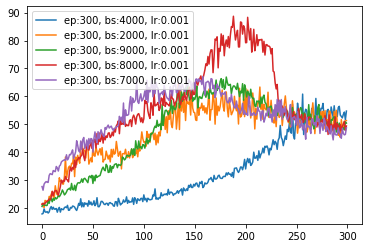

In [22]:
'''========== BEST RETURNS =========='''
for val in vals[:5]:
    print(val[0])
    params = re.findall('\d+', val[0])
    epochs = params[1]
    batch_size = params[2]
    lr = float(f'{params[3]}.{params[4]}')
    label = f'ep:{epochs}, bs:{batch_size}, lr:{lr}'
    df = pd.read_csv(f'{path}/{val[0]}')
    plt.plot(df['agent0_avg_rets'], label=label)
plt.legend()

cartpole_simplepg-0_epochs300_batch_size5000_lr1e-06_.csv
cartpole_simplepg-0_epochs300_batch_size2000_lr1e-08_.csv
cartpole_simplepg-0_epochs300_batch_size6000_lr1e-08_.csv
cartpole_simplepg-0_epochs300_batch_size1000_lr1e-08_.csv
cartpole_simplepg-0_epochs300_batch_size6000_lr1e-06_.csv


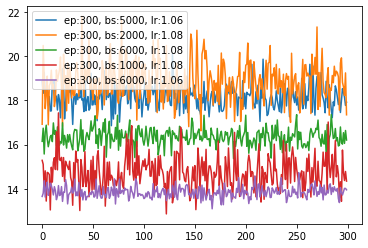

In [24]:
'''========== BEST RETURNS =========='''
for val in vals[-5:]:
    print(val[0])
    params = re.findall('\d+', val[0])
    epochs = params[1]
    batch_size = params[2]
    lr = float(f'{params[3]}.{params[4]}')
    label = f'ep:{epochs}, bs:{batch_size}, lr:{lr}'
    df = pd.read_csv(f'{path}/{val[0]}')
    plt.plot(df['agent0_avg_rets'], label=label)
plt.legend()

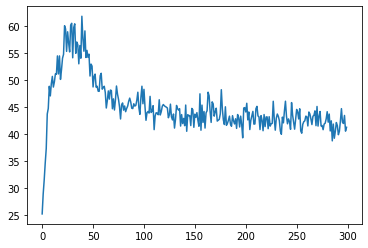

In [3]:
path = '/home/zane/Documents/code/research/uw2020/masuite/tmp/cartpole_simplepg-0.csv'
df1 = pd.read_csv(path)
plt.plot(df1['agent0_avg_rets'])